# Imports and Loadings

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sklearn.preprocessing as preprocessing
from sklearn import decomposition
import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
output_notebook()

Loading BokehJS ...

In [2]:
full_df = pd.DataFrame.from_csv('Data/Lamas_muni_data_from_SQL.csv')
full_df.reset_index(inplace=True)
print full_df.shape

(255, 386)


In [3]:
print full_df.shape
full_df.head()

(255, 386)


,accidents_road_with_injured_rate_per_1000_residents_2015,accidents_road_with_injured_rate_per_1000_vehicles_transportati,accidents_road_with_injured_total_2015,age_avg_of_recip_funds_unemployment_not_incl_soldiers_2015,age_avg_of_transportation_private_years_2015,arab_pct_2015,arnona_residential_collection_late_fund_interest_2015,arnona_residential_collection_the_year_fund_interest_2015,arnona_residential_total_exemption_releases_discounts_2015,avg_distances_km_2006,...,waste_solid_residential_commercial_cutting_kg_daily_per_capita_,xfer_expenses_one_time_incl_cover_deficit_acc_of_municipality_1,xfer_expenses_one_time_incl_cover_deficit_acc_of_municipality_p,xfer_incomes_one_time_to_cover_deficit_acc_1000s_nis_2015,xfer_incomes_one_time_to_cover_deficit_acc_pct_change_real_2015,year_reception_status_municipal,fingerprint,entity_id,entity_kind,entity_name
0,1.0,2.0,3.0,43.0,8.0,NaN,148.0,3883.0,858.0,NaN,...,2.9,1272.0,68.6,NaN,NaN,1949.0,פינה ראש,500200266.0,municipality,מ. מ. ראש פינה
1,0.7,1.8,9.0,43.0,7.0,NaN,779.0,20276.0,3354.0,NaN,...,1.8,92.0,-55.5,NaN,NaN,1952.0,בתיה מזכרת,500200282.0,municipality,מ. מ. מזכרת בתיה
2,NaN,NaN,NaN,39.0,8.0,NaN,123.0,3247.0,559.0,NaN,...,2.7,42.0,-81.8,NaN,NaN,1949.0,המעלה יסוד,500200290.0,municipality,מ. מ. יסוד המעלה
3,0.6,2.8,16.0,41.0,8.0,NaN,NaN,NaN,NaN,NaN,...,1.5,3246.0,-12.1,1937.0,67.4,1995.0,אופקים,500200316.0,municipality,עירית אופקים
4,1.2,2.7,4.0,44.0,8.0,NaN,434.0,4947.0,1104.0,NaN,...,1.8,92.0,7.6,NaN,NaN,1977.0,אליכין,500200415.0,municipality,מ. מ. אליכין


# Preprocessing

In [4]:
(full_df.notnull().sum()==0).sum()

2

In [5]:
full_df.notnull().sum()

accidents_road_with_injured_rate_per_1000_residents_2015           228
accidents_road_with_injured_rate_per_1000_vehicles_transportati    228
accidents_road_with_injured_total_2015                             228
age_avg_of_recip_funds_unemployment_not_incl_soldiers_2015         255
age_avg_of_transportation_private_years_2015                       255
arab_pct_2015                                                      105
arnona_residential_collection_late_fund_interest_2015              241
arnona_residential_collection_the_year_fund_interest_2015          244
arnona_residential_total_exemption_releases_discounts_2015         243
avg_distances_km_2006                                                0
avg_distances_weighted_km_2006                                      52
avg_students_per_class_in_schools_elementary_incl_education_spe    253
avg_students_per_class_in_schools_high_2015_2014/15                222
avg_students_per_class_middle_school_2015_2014/15                  216
avg_st

## drop features

In [6]:
df = full_df.copy()
drop_cols = ['entity_name',
             'name_municipality',
            'fingerprint',
             'entity_kind',
             'entities_institute_jewish_2015',
             'entities_rural_other_jewish_2015',
             'entities_rural_other_non_jewish_2015',
             'entities_urban_jewish_4999-2000_residents_2015',
             'entities_urban_jewish_9000-5000_residents_2015',
             'entities_urban_kibutz_4999-2000_residents_2015',
             'entities_urban_moshav_4999-2000_residents_2015',
             'entities_urban_moshav_sharing_4999-2000_residents_2015',
             'entities_urban_non_jewish_4999-2000_residents_2015',
             'name_committee_planning_construction_2015'
            ]
drop_cols += list(full_df.notnull().sum()[full_df.notnull().sum()==0].index)
print 'additionaly, removing these columns: ', list(full_df.notnull().sum()[full_df.notnull().sum()==0].index)
df.drop(labels=drop_cols, axis = 1, inplace=True)

additionaly, removing these columns:  ['avg_distances_km_2006', 'entities_institute_non_jewish_2015']


## separate categorical data and convert to separate binary columns

In [7]:
# for column in df.columns:
#     if len(df[column].unique())<=10:
#         print column, df[column].unique()

In [8]:
categorical_cols = ['status_municipal_2015',
                   'space_sea_municipalities_local_bordering_beach_sea',
                    'index_peripheral_2004_grade_by_group_cluster',
                    'district_2015'
                   ]

In [9]:
tmp = df[categorical_cols].copy()
categorical_df = pd.get_dummies(tmp)

## fill missing data

Fill with zeros

In [10]:
df.replace(to_replace=np.nan, value = 0, inplace=True)

## separate numerical values and standardize

In [11]:
numerical_columns = list(set(df.columns)-set(categorical_cols))
print len(df.columns), len(numerical_columns), len(categorical_cols)

370 366 4


### sparse features

In [12]:
counter =0 
for column in numerical_columns:
    try:
        if df[column].median() == 0:
            counter+=1
    except:
        print column
print counter

74


## scale: MinMax / "Robust Scaler"

more methods in: http://scikit-learn.org/stable/modules/preprocessing.html

In [13]:
scaled_numerical_df= df[numerical_columns].copy()
min_max_scaler = preprocessing.MinMaxScaler()
scaled_numerical_df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
# robust_scaler = preprocessing.RobustScaler()
# scaled_numerical_df[numerical_columns] = robust_scaler.fit_transform(df[numerical_columns])
scaled_numerical_df.head()

,pct_recip_supp_income_out_of_recip_handouts_old_age_survivors_2,total_income_of_municipality_budget_non_regular_pct_change_real,prop_topographic_2006_std_dev_of_heights_above_level_sea_rating,charge_arnona_industry_workshops_1000s_nis_2014,number_the_kids_due_to_paid_handouts_in_families_with_2-1_kids_,avg_students_per_class_in_schools_elementary_incl_education_spe,uses_land_area_open_other_2013_pct_of_all_area_jurisdiction,income_own_of_municipality_of_education_pct_change_real_2015_vs,charge_arnona_rest_kinds_asset_area_1000s_m2_2014,charge_arnona_rest_kinds_asset_area_1000s_m2_2015,...,kibutz_2015,use_water_residential_institutional_municipality_local_1000s_m3,recip_funds_unemployment_men_2015_avg_monthly,incoming_from_places_other_age_29-15_2015,pct_freelancers_earning_to_half_wage_avg_in_2014,total_population_end_2015_1000s,avg_distances_weighted_km_2006,total_expenses_of_municipality_budget_regular_1000s_nis_2015,income_of_municipality_budget_non_regular_part_own_assets_pct_c,pct_immigrants_aged_65_and_above_settlement_first_2015
0,0.0,0.000000,0.928934,0.006753,0.002071,0.628571,0.0,0.231774,0.001960,0.003158,...,0.0,0.010920,0.003058,0.003541,0.830882,0.002197,0.0,0.007524,0.311434,0.000
1,0.0,0.117551,0.081218,0.006200,0.012885,0.885714,0.0,0.243743,0.015463,0.015299,...,0.0,0.034321,0.025076,0.009294,0.240196,0.013531,0.0,0.013779,0.311434,0.167
2,0.0,0.045170,0.487310,0.001111,0.000861,0.628571,0.0,0.487758,0.000014,0.000014,...,0.0,0.004160,0.000000,0.001992,0.367647,0.000694,0.0,0.002303,0.311434,0.000
3,0.0,0.254150,0.248731,0.032432,0.034315,0.571429,0.0,1.000000,0.004536,0.004419,...,0.0,0.060322,0.072171,0.031202,0.458333,0.028449,0.0,0.030479,0.492735,0.059
4,0.0,0.302585,0.060914,0.000009,0.003597,0.714286,0.0,0.151795,0.000000,0.000007,...,0.0,0.003640,0.009174,0.001992,0.296569,0.002776,0.0,0.005002,0.311434,0.000


In [14]:
scaled_numerical_df.describe()

,pct_recip_supp_income_out_of_recip_handouts_old_age_survivors_2,total_income_of_municipality_budget_non_regular_pct_change_real,prop_topographic_2006_std_dev_of_heights_above_level_sea_rating,charge_arnona_industry_workshops_1000s_nis_2014,number_the_kids_due_to_paid_handouts_in_families_with_2-1_kids_,avg_students_per_class_in_schools_elementary_incl_education_spe,uses_land_area_open_other_2013_pct_of_all_area_jurisdiction,income_own_of_municipality_of_education_pct_change_real_2015_vs,charge_arnona_rest_kinds_asset_area_1000s_m2_2014,charge_arnona_rest_kinds_asset_area_1000s_m2_2015,...,kibutz_2015,use_water_residential_institutional_municipality_local_1000s_m3,recip_funds_unemployment_men_2015_avg_monthly,incoming_from_places_other_age_29-15_2015,pct_freelancers_earning_to_half_wage_avg_in_2014,total_population_end_2015_1000s,avg_distances_weighted_km_2006,total_expenses_of_municipality_budget_regular_1000s_nis_2015,income_of_municipality_budget_non_regular_part_own_assets_pct_c,pct_immigrants_aged_65_and_above_settlement_first_2015
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,0.024302,0.258056,0.375615,0.049525,0.042893,0.696807,0.064805,0.233531,0.020007,0.020360,...,0.036241,0.045315,0.072337,0.031915,0.389389,0.036947,0.060598,0.046021,0.322780,0.088051
std,0.102878,0.165547,0.328554,0.114357,0.093679,0.111648,0.173712,0.098931,0.094424,0.094094,...,0.118079,0.096982,0.130058,0.080711,0.193357,0.083105,0.143253,0.102448,0.145919,0.133005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.145578,0.012690,0.000892,0.007467,0.657143,0.000000,0.190560,0.000114,0.000092,...,0.000000,0.002080,0.012844,0.003928,0.256127,0.007286,0.000000,0.009838,0.311434,0.000000
50%,0.000000,0.223401,0.335025,0.006753,0.016275,0.714286,0.000000,0.212459,0.000969,0.000966,...,0.000000,0.013521,0.028746,0.009847,0.379902,0.015034,0.000000,0.019329,0.311434,0.043000
75%,0.000000,0.324490,0.662437,0.038215,0.037574,0.771429,0.000000,0.247144,0.006994,0.006937,...,0.000000,0.040562,0.071560,0.027384,0.512255,0.032612,0.000000,0.039323,0.311434,0.133000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## unite back

In [15]:
clean_df = pd.merge(scaled_numerical_df, categorical_df, how= 'inner', left_index=True, right_index=True)
clean_df.shape

(255, 382)

# Use all features, compress, explore clusters

## Dimensionality Reduction

In [16]:
pca = decomposition.PCA(n_components=10)
pca.fit(clean_df)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_ratio_

array([ 0.21198077,  0.14716079,  0.08112233,  0.05825656,  0.04767151,
        0.03768056,  0.03178112,  0.02523178,  0.02109102,  0.02001676])

In [18]:
print np.sum(pca.explained_variance_ratio_)

0.681993201033


In [19]:
projected_df = pca.transform(clean_df)
print projected_df.shape

(255L, 10L)


## plot projected data

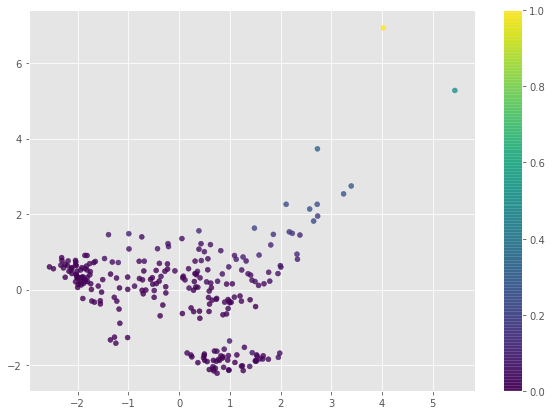

In [38]:
plt.clf()
plt.subplots(1, figsize=(10, 7))
plt.scatter(x=projected_df[:,0], y=projected_df[:,1], 
           s=25, c=clean_df['total_population_end_2015_1000s'], cmap='viridis', alpha=0.8)
plt.colorbar()
plt.show()

Make interactive so I can choose which PC's to show, see which city each point represents, and maybe also color by a variable from the df?

In [ ]:
# create a Figure object
p = figure(plot_width=600, plot_height=600, tools="pan,reset,save,zoom_in,zoom_out")

# add a Circle renderer to this figure
p.circle(projected_df[:,7], projected_df[:,3], radius=.02, alpha=0.5)

# display the figure
show(p)

read: http://build.holoviews.org/, http://biobits.org/bokeh-jupyter-embed.html, http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html, 

## Correlate PCs with budget

## Cluster

http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

# Like Tel-Aviv but not Tel-Aviv

Based on: https://www.nytimes.com/interactive/2018/04/03/upshot/what-is-your-citys-twin.html

## Choose a subset of features (scale?)

## Which is most similar?

## Categories. Which is most similiar but from a different category?

For example: different size, geographic region, demographics 